In [1]:
import random, glob
import numpy as np

In [2]:
music_files = [a for a in glob.glob("dataset/*/*")]
print("A random song", random.sample(music_files, 1))

A random song ['dataset\\chopin\\chpn-p13.mid']


In [3]:
from music21 import midi
def play_midi_file(midi_file_name):
    mf = midi.MidiFile()

    mf.open(midi_file_name) # path='abc.midi'
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

In [4]:
len(music_files)

300

In [5]:
from music21 import converter,corpus, chord

In [6]:
tonic_mode_all = []
for i, name in enumerate(music_files[:5]):
    try:
        parsed_score = converter.parse(name)
        key_of_one = parsed_score.analyze('key')
        tonic_mode_all.append((i, name, key_of_one.tonic.name, key_of_one.mode))
    except:
        print(f'Error at {i}')
        tonic_mode_all.append((i, name, 'NAN', 'NAN'))
        continue
    print(f'{tonic_mode_all[i]}')

(0, 'dataset\\albeniz\\alb_esp1.mid', 'D', 'minor')
Error at 1
(2, 'dataset\\albeniz\\alb_esp2.mid', 'D', 'major')
(3, 'dataset\\albeniz\\alb_esp3.mid', 'E', 'minor')
(4, 'dataset\\albeniz\\alb_esp4.mid', 'G', 'minor')


In [7]:
def get_chords(music_files):
    chords = []
    for file_no, filename in enumerate(music_files):
        try:
            chords.append(converter.parse(filename))
            print(f'Happening of {file_no}', "filename = ", filename)
            
        except:
            print(f'Happening of {file_no}', "filename = ", filename)
            print("file failed!!!!!")
            continue
        
    
    return chords

In [8]:
music_files_5 = music_files[:5]
#get_chords(music_files[:10])

In [9]:
chords_of_all_music = get_chords(music_files_5)

Happening of 0 filename =  dataset\albeniz\alb_esp1.mid
Happening of 1 filename =  dataset\albeniz\alb_esp1.song
file failed!!!!!
Happening of 2 filename =  dataset\albeniz\alb_esp2.mid
Happening of 3 filename =  dataset\albeniz\alb_esp3.mid
Happening of 4 filename =  dataset\albeniz\alb_esp4.mid


In [10]:
#compressed chords if all music
chords_of_all_music[:5]

[<music21.stream.Score 0x2e90c9bcb20>,
 <music21.stream.Score 0x2e90e5a3520>,
 <music21.stream.Score 0x2e90f6d8070>,
 <music21.stream.Score 0x2e9112091c0>]

In [11]:
from music21 import chord, duration

Classifying the music into different modes
- firstly, let's code for major mode

In [12]:
from music21 import *

In [13]:
# for seeing output from chords and given duration:
def get_music_midi_from_chords_and_duration(input_chords):
    midi_stream = stream.Stream()

    for note_pattern, duration_pattern in input_chords:
        notes_in_chord = note_pattern.split('.')
        
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        
        midi_stream.append(new_chord)

        new_tempo = tempo.MetronomeMark(number=50)
            
        midi_stream.append(new_tempo)

    midi_stream = midi_stream.chordify()
    timestr = time.strftime("%Y%m%d-%H%M%S")
    new_file = 'output-' + timestr + '.mid'
    return midi_stream.write('midi', fp=new_file)

In [14]:
def round_chord_durations(number):
    if(number>1.25):
        return 2
    if(number>.30):
        return 1.25
    if(number>.10):
        return 0.3
    return 0.1

For chord and duration of a single song(music file)

In [15]:
def get_chord_and_duration_data(indv_midi_chordified):
    chord_duration_data = []
    for element in indv_midi_chordified.flat:
        if isinstance(element, chord.Chord):
            chord_duration = round_chord_durations(element.duration.quarterLength)
            chord_name = ".".join([n.nameWithOctave for n in element.pitches])
            chord_duration_data.append((chord_name, chord_duration))

    return chord_duration_data

In [16]:
chords_and_duration_data_all_music= []
for one_music_chords in chords_of_all_music:
   chords_and_duration_data_all_music.append((get_chord_and_duration_data(one_music_chords)))

In [17]:
# this is the main data:
type(chords_and_duration_data_all_music[0][0][1])

float

In [18]:
print("Generating music from our processed chords...")
proccessed_chords_to_midi_sample = get_music_midi_filename_from_chords(chords_and_duration_data_all_music[0][4:50])
print(proccessed_chords_to_midi_sample)
play_midi_file(proccessed_chords_to_midi_sample)

Generating music from our processed chords...


NameError: name 'get_music_midi_filename_from_chords' is not defined

from Tonic_mode_all, separating major and minor songs 

In [19]:
tonic_mode_all[0][0], tonic_mode_all[0][-1]

(0, 'minor')

In [20]:
all_major_songs_chords_and_duration = []
all_minor_songs_chords_and_duration = []
for i in range(len(tonic_mode_all)):
    if(tonic_mode_all[i][-1] == 'major'):
        try:
            all_major_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
            all_major_songs_chords_and_duration.append('NANNNNNN')
    else:
        try:
            all_minor_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
             all_minor_songs_chords_and_duration.append('NANNNNNN')

In [21]:
len(all_minor_songs_chords_and_duration), #minor_songs_chords_with_duration, len(minor_songs_chords_with_duration)

(4,)

In [22]:
major_dataset = all_major_songs_chords_and_duration 
minor_dataset = all_minor_songs_chords_and_duration

In [23]:
#just a reference code
#major_dataset
#y=np.array(major_dataset)
#unique = set(major_dataset_all)
#unique2 = set(minor_dataset_all)

In [24]:
chords_and_duration_data_all_music

[[('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('C4.B-3', 0.3),
  ('E6.F6', 0.3),
  ('E4.F4', 0.3),
  ('D6.E6', 0.3),
  ('D4.E4', 0.3),
  ('B-6.C7', 0.3),
  ('B-4.C5', 0.3),
  ('F6.G6', 0.3),
  ('F4.G4', 0.3),
  ('C4.B-3', 0.3),
  ('E4.C#4', 1.25),
  ('B-3.E4.D4', 1.25),
  ('C#4.E4', 1.25),
  ('B-3.E4.D4', 1.25),
  ('B-4.E5', 2),
  ('G#3.D4', 2),
  ('C6.D6', 0.3),
  ('C4.D4', 0.3),
  ('E7.A6.A7', 2),
  ('C#6.A4.E5', 2)],
 [('D2.D3', 2),
  ('A4.F#4.D4', 1.25),
  ('A1.A2', 1.25),
  ('D2.D3', 2),
  ('D4.F#4.A4', 1.25),
  ('A1.A2', 1.25),
  ('A3.D4', 1.25),
  ('F#4.F#4', 0.3),
  ('A3.D4.F#4.A4', 2),
  ('F#4.D5', 0.3),
  ('C#5.E5', 0.3),
  ('F4.B4', 1.25),
  ('C#4.G4', 2),
  ('E4.G4', 0.3),
  ('F#4.A4', 0.3),
  ('G4.B4', 1.25),
  ('C#5.A4', 0.3),
  ('C#5.E5', 1.25),
  ('B4.D5', 1.25),
  ('B4.D5.C#5.E5', 0.3),
  ('B4.D5', 0

In [25]:
main_dataset = chords_and_duration_data_all_music

* Data preparation stage

In [51]:
no_of_timesteps = 32
x = []
y = []
## CD stands for chord and duration.

for each_music_with_CD in main_dataset:
    for each_CD in range(0, len(each_music_with_CD) - no_of_timesteps,  1):
        
        ## preparing input and output sequences:
        input_ = each_music_with_CD[each_CD:each_CD + no_of_timesteps]
        output = each_music_with_CD[each_CD + no_of_timesteps]
        
        for i in range(len(input_)):
            input_[i]= "@".join(map(str,input_[i]))
            
        output = "@".join(map(str,output))
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [52]:
y

array(['G4.D4@1.25', 'B2.F3@1.25', 'D5.D4.F#4@2', 'G#4.F#5@1.25',
       'A4.F#5@1.25', 'G4.C#5@1.25', 'A4.E4@1.25', 'C#4.F#4@1.25',
       'A4.D4@1.25', 'B2.F3@1.25', 'G#4.D4@1.25', 'C#4.A4@1.25',
       'A3.C#4@0.3', 'A3.D4@1.25', 'F#4.F#4@0.3', 'D4.A3.F#4.A4@2',
       'F#4.D5@0.3', 'C#5.E5@0.3', 'F4.B4@1.25', 'C#4.G4@2', 'E4.G4@0.3',
       'F#4.B-4@0.3', 'G4.B4@1.25', 'B-4.C#5@0.3', 'E5.C#5@1.25',
       'D5.G4.E4@1.25', 'E4.F#4.B-4@1.25', 'F#4.B-4@0.3', 'F#4.C#5@1.25',
       'B-3.F#4@1.25', 'F4.C#5@1.25', 'F#4.D5@1.25', 'G4.B4@2',
       'F#4.B4@2', 'F#3.A3@0.3', 'G4.B4@2', 'F#4.B4@2', 'F#3.A3@0.3',
       'D4.F#4@2', 'F#4.C#4@2', 'C#3.F3@0.3', 'B-4.C#5@0.3', 'C#4.F4@0.3',
       'C#4.F#4.B-4@2', 'E-5.F5@0.3', 'E-4.F4.E-4@0.3', 'B-4.F#4@1.25',
       'C#5.F5@0.3', 'E-5.F5@0.3', 'F#4.C#4.B-4@1.25', 'D4.F#4@1.25',
       'D3.C4@1.25', 'C#3.B3@1.25', 'C#4.F#4@1.25', 'F#3.B-3@1.25',
       'C4.E-4@1.25', 'B2.A3@1.25', 'A2.G3@1.25', 'A3.D4@1.25',
       'F#4.F#4@0.3', 'F#4.A3.D4.A4@2

In [28]:
#assigning unique integer to every chords_and_duration

unique_x_CD = list(set(x.ravel()))
unique_x_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_x_CD))
unique_x_CD_to_int

{'E5.A5@0.3': 0,
 'G#4.D4@1.25': 1,
 'C#4.A4.F#4@1.25': 2,
 'B-4.F4.D5@1.25': 3,
 'A3.D4.F#4.A4@2': 4,
 'G4.B4@1.25': 5,
 'B-4.C#5@0.3': 6,
 'G#4.F#5@1.25': 7,
 'G#4.D4@2': 8,
 'E5.C#5@1.25': 9,
 'C5.D5@1.25': 10,
 'C#5.A4@1.25': 11,
 'A1.A2@1.25': 12,
 'C#5.E5@1.25': 13,
 'E-4.B3.F#3@2': 14,
 'D4.A3.F#4.A4@2': 15,
 'F#4.B-4@2': 16,
 'C#4.G4@2': 17,
 'F#4.F#4@0.3': 18,
 'A3.C#4@0.3': 19,
 'D4.B-3@2': 20,
 'G4.D5.G5@0.3': 21,
 'D4.F3@2': 22,
 'G2.D3.B-3@1.25': 23,
 'A4.F#4@1.25': 24,
 'F#4.B-3@2': 25,
 'G4.D4@1.25': 26,
 'D4.B-4@1.25': 27,
 'G4.B4@0.3': 28,
 'B-3.F#4@1.25': 29,
 'B4.D5@0.3': 30,
 'B-4.F#5@0.3': 31,
 'G4.A4@0.3': 32,
 'D5.D4.F#4@2': 33,
 'C#5.E5@0.3': 34,
 'A4.E4@1.25': 35,
 'B2.F#3@1.25': 36,
 'G#4.B-4@1.25': 37,
 'C#4.D4@0.3': 38,
 'B-4.F#4@2': 39,
 'E-6.B6.F#7@0.3': 40,
 'A3.D4@1.25': 41,
 'C5.D5@0.3': 42,
 'F#4.D5@0.3': 43,
 'C#5.A4@0.3': 44,
 'C6.A5@0.3': 45,
 'E-4.F4@0.3': 46,
 'F4.B4@1.25': 47,
 'F4.C#5@1.25': 48,
 'C4.F#4@2': 49,
 'B4.D5.C#5.E5@0.3': 50,
 'D4.D5@

In [29]:
#preparing input sequences::

x_seq=[]
for each_row in x:
    temp=[]
    for each_piece in each_row:
        #assigning unique integer to every note
        temp.append(unique_x_CD_to_int[each_piece])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)
x_seq.shape

(505, 32)

In [30]:
# preparing th output sequences as well::

unique_y_CD = list(set(y))
unique_y_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_y_CD)) 
unique_y_CD_to_int

{'G6.F#6@0.3': 0, 'F#4.D5@1.25': 1, 'G4.E-4.C4@2': 2, 'A4.F#5@1.25': 3}

In [31]:
y_seq=np.array([unique_y_CD_to_int[i] for i in y])
y_seq.shape

(505,)

In [32]:
# preserving 80% of the data for training and the rest 20% for the evaluation:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [33]:
len(x_val)

101

# model building phase:

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [36]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x_CD), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y_CD), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           8500      
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [46]:
def lstm():
    K.clear_session()
    model = Sequential()
    #embedding layer
    model.add(Embedding(len(unique_x_CD), 100, input_length=32,trainable=True)) 
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dense(len(unique_y_CD), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

In [47]:
model = lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           8500      
                                                                 
 lstm (LSTM)                 (None, 32, 128)           117248    
                                                                 
 dropout (Dropout)           (None, 32, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0

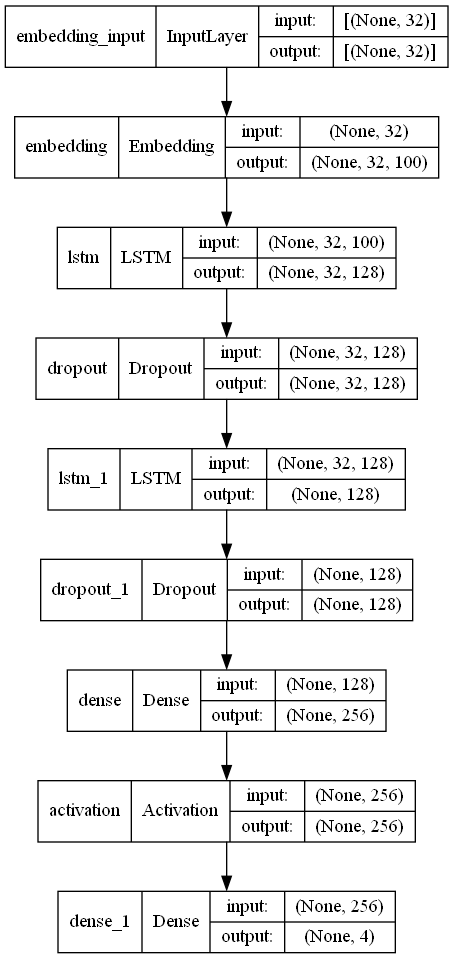

In [49]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes =True, show_layer_names = True)

In [ ]:
!pip install h5py

In [ ]:
import h5py

In [ ]:
#defining call back to save the best model during training>
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
#actual training
history = model.fit(np.array(x_train),np.array(y_train),batch_size=128,epochs=10, 
                   validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

In [ ]:
#loading best model (Previously trained modle)
from keras.models import load_model
model = load_model('best_model.h5')


In [ ]:
import numpy as np
import random
ind = np.random.randint(0,len(x_val)-1)
random_music = x_val[ind]
random_music

In [ ]:
predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)
    print("random music = ", random_music)
    

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

In [ ]:
#intergers back to notes
unique_x_int_to_CD = dict((number, note_) for number, note_ in enumerate(unique_x_CD)) 
unique_x_int_to_CD

In [ ]:
predicted_CD = [unique_x_int_to_CD[i] for i in predictions]
predicted_CD

In [ ]:
predicted_CD_split = []
for each_outcome in predicted_CD:
    temp_list = []
    temp_list = each_outcome.split("@")
    temp_list[1] =float(temp_list[1])
    predicted_CD_split.append(tuple(temp_list))
    

predicted_CD_split

In [ ]:
print("Generating music from our processed chords...")
proccessed_chords_to_midi_sample = get_music_midi_from_chords_and_duration(predicted_CD_split)
print(proccessed_chords_to_midi_sample)
play_midi_file(proccessed_chords_to_midi_sample)